(markov_perf)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Markov Perfect Equilibrium

```{index} single: Markov Perfect Equilibrium
```

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon

## Overview

```{index} single: Markov Perfect Equilibrium; Overview
```

This lecture describes the concept of Markov perfect equilibrium.

Markov perfect equilibrium is a key notion for analyzing economic problems involving dynamic strategic interaction, and a cornerstone of applied game theory.

In this lecture, we teach Markov perfect equilibrium by example.

We will focus on settings with

* two players
* quadratic payoff functions
* linear transition rules for the state

Other references include chapter 7 of {cite}`Ljungqvist2012`.

Let's start with some standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe

## Background

```{index} single: Markov Perfect Equilibrium; Background
```

Markov perfect equilibrium is a refinement of the concept of Nash equilibrium.

It is used to study settings where multiple decision-makers interact non-cooperatively over time, each pursuing its own objective.

The agents in the model face a common state vector, the time path of which is influenced by -- and influences -- their decisions.

In particular, the transition law for the state that confronts each agent is affected by decision rules of other agents.

Individual payoff maximization requires that each agent solve a dynamic programming problem that includes  this transition law.

Markov perfect equilibrium prevails when no agent wishes to revise its policy, taking as given the policies of all other agents.

Well known examples include

* Choice of price, output, location or capacity for firms in an industry (e.g., {cite}`ericson1995markov`, {cite}`ryan2012costs`, {cite}`doraszelski2010computable`).
* Rate of extraction from a shared natural resource, such as a fishery (e.g., {cite}`levhari1980great`, {cite}`van2011dynamic`).

Let's examine a model of the first type.

### Example: A Duopoly Model

Two firms are the only producers of a good, the demand for which is governed by a linear inverse demand function

```{math}
:label: game2

p = a_0 - a_1 (q_1 +  q_2)
```

Here $p = p_t$ is the price of the good, $q_i = q_{it}$ is the output of firm $i=1,2$ at time $t$ and $a_0 > 0, a_1 >0$.

In {eq}`game2` and what follows,

* the time subscript is suppressed when possible to simplify notation
* $\hat x$ denotes a next period value of variable $x$

Each firm recognizes that its output affects total output and therefore the market price.

The one-period payoff function of firm $i$ is price times quantity minus adjustment costs:

```{math}
:label: game1

\pi_i = p q_i - \gamma (\hat q_i - q_i)^2, \quad \gamma > 0 ,
```

Substituting the inverse demand curve {eq}`game2` into {eq}`game1` lets us express the one-period payoff as

```{math}
:label: game3

\pi_i(q_i, q_{-i}, \hat q_i) = a_0 q_i - a_1 q_i^2 - a_1 q_i q_{-i} - \gamma (\hat q_i - q_i)^2 ,
```

where $q_{-i}$ denotes the output of the firm other than $i$.

The objective of the firm is to maximize $\sum_{t=0}^\infty \beta^t \pi_{it}$.

Firm $i$ chooses a decision rule that sets next period quantity $\hat q_i$ as a function $f_i$ of the current state $(q_i, q_{-i})$.

An essential aspect of a Markov perfect equilibrium is that each firm takes the decision rule of the other firm as known and given.

Given $f_{-i}$, the Bellman equation of firm $i$ is

```{math}
:label: game4

v_i(q_i, q_{-i}) = \max_{\hat q_i}
   \left\{\pi_i (q_i, q_{-i}, \hat q_i) + \beta v_i(\hat q_i, f_{-i}(q_{-i}, q_i)) \right\}
```

**Definition**  A *Markov perfect equilibrium* of the duopoly model is a pair of value functions $(v_1, v_2)$ and a pair of policy functions $(f_1, f_2)$ such that, for each $i \in \{1, 2\}$ and each possible state,

* The value function $v_i$ satisfies  Bellman equation {eq}`game4`.
* The maximizer on the right side of {eq}`game4`  equals $f_i(q_i, q_{-i})$.

The adjective "Markov" denotes that the equilibrium decision rules depend only on the current values of the state variables, not other parts of their histories.

"Perfect" means complete, in the sense that the equilibrium is constructed by backward induction and hence builds in optimizing behavior for each firm at all possible future states.

* These include many states that will not be reached when we iterate forward on the pair of equilibrium strategies $f_i$ starting from a given initial state.

### Computation

One strategy for computing a Markov perfect equilibrium is iterating to convergence on pairs of Bellman equations and decision rules.

In particular, let $v_i^j,f_i^j$ be the value function and policy function for firm $i$ at the $j$-th iteration.

Imagine constructing the iterates

```{math}
:label: game6

v_i^{j+1}(q_i, q_{-i}) = \max_{\hat q_i}
   \left\{\pi_i (q_i, q_{-i}, \hat q_i) + \beta v^j_i(\hat q_i, f_{-i}(q_{-i}, q_i)) \right\}
```

These iterations can be challenging to implement computationally.

However, they simplify for the case in which  one-period payoff functions are quadratic and  transition laws are linear --- which takes us to our next topic.

## Linear Markov Perfect Equilibria

```{index} single: Linear Markov Perfect Equilibria
```

As we saw in the duopoly example, the study of Markov perfect equilibria in games with two players leads us to an interrelated pair of Bellman equations.

In linear-quadratic dynamic games, these "stacked Bellman equations" become "stacked Riccati equations" with a tractable mathematical structure.

We'll lay out that structure in a general setup and then apply it to some simple problems.

### Coupled Linear Regulator Problems

We consider a general linear-quadratic regulator game with two players.

For convenience, we'll start with a finite horizon formulation, where $t_0$ is the initial date and $t_1$ is the common terminal date.

Player $i$ takes $\{u_{-it}\}$ as given and minimizes

```{math}
:label: orig-1

\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
\left\{
    x_t' R_i x_t +
    u_{it}' Q_i u_{it} +
    u_{-it}' S_i u_{-it} +
    2 x_t' W_i u_{it} +
    2 u_{-it}' M_i u_{it}
\right\}
```

while the state evolves according to

```{math}
:label: orig-0

x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t}
```

Here

* $x_t$ is an $n \times 1$ state vector and  $u_{it}$ is a $k_i \times 1$ vector of controls for player $i$
* $R_i$ is $n \times n$
* $S_i$ is $k_{-i} \times k_{-i}$
* $Q_i$ is $k_i \times k_i$
* $W_i$ is $n \times k_i$
* $M_i$ is $k_{-i} \times k_i$
* $A$ is $n \times n$
* $B_i$ is $n \times k_i$

### Computing Equilibrium

We formulate a linear Markov perfect equilibrium as follows.

Player $i$ employs linear decision rules $u_{it} = - F_{it} x_t$, where $F_{it}$ is a $k_i \times n$ matrix.

A Markov perfect equilibrium is a pair of sequences $\{F_{1t}, F_{2t}\}$ over $t = t_0, \ldots, t_1 - 1$ such that

* $\{F_{1t}\}$ solves player 1's problem, taking $\{F_{2t}\}$ as given, and
* $\{F_{2t}\}$ solves player 2's problem, taking $\{F_{1t}\}$ as given

If we take $u_{2t} = - F_{2t} x_t$ and substitute it into {eq}`orig-1` and {eq}`orig-0`, then player 1's problem becomes minimization of

```{math}
:label: eq_mpe_p1p

\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
    \left\{
    x_t' \Pi_{1t} x_t +
    u_{1t}' Q_1 u_{1t} +
    2 u_{1t}' \Gamma_{1t} x_t
    \right\}
```

subject to

```{math}
:label: eq_mpe_p1d

x_{t+1} = \Lambda_{1t} x_t + B_1 u_{1t},
```

where

* $\Lambda_{it} := A - B_{-i} F_{-it}$
* $\Pi_{it} := R_i + F_{-it}' S_i F_{-it}$
* $\Gamma_{it} := W_i' - M_i' F_{-it}$

This is an LQ dynamic programming problem that can be solved by working backwards.

Decision rules that solve this problem are

```{math}
:label: orig-3

F_{1t}
= (Q_1 + \beta B_1' P_{1t+1} B_1)^{-1}
(\beta B_1' P_{1t+1} \Lambda_{1t} + \Gamma_{1t})
```

where $P_{1t}$ solves the matrix Riccati difference equation

```{math}
:label: orig-4

P_{1t} =
\Pi_{1t} - (\beta B_1' P_{1t+1} \Lambda_{1t} +
\Gamma_{1t})' (Q_1 + \beta B_1' P_{1t+1} B_1)^{-1}
(\beta B_1' P_{1t+1} \Lambda_{1t} + \Gamma_{1t}) +
\beta \Lambda_{1t}' P_{1t+1} \Lambda_{1t}
```

Similarly, decision rules that solve player 2's problem are

```{math}
:label: orig-5

F_{2t} = (Q_2 + \beta B_2' P_{2t+1} B_2)^{-1}
(\beta B_2' P_{2t+1} \Lambda_{2t} + \Gamma_{2t})
```

where $P_{2t}$ solves

```{math}
:label: orig-6

P_{2t} =
\Pi_{2t} - (\beta B_2' P_{2t+1} \Lambda_{2t} +
\Gamma_{2t})' (Q_2 + \beta B_2' P_{2t+1} B_2)^{-1}
(\beta B_2' P_{2t+1} \Lambda_{2t} + \Gamma_{2t}) +
\beta \Lambda_{2t}' P_{2t+1} \Lambda_{2t}
```

Here, in all cases $t = t_0, \ldots, t_1 - 1$ and the terminal conditions are $P_{it_1} = 0$.

The solution procedure is to use equations {eq}`orig-3`, {eq}`orig-4`, {eq}`orig-5`, and {eq}`orig-6`, and "work backwards" from time $t_1 - 1$.

Since we're working backward, $P_{1t+1}$ and $P_{2t+1}$ are taken as given at each stage.

Moreover, since

* some terms on the right-hand side of {eq}`orig-3` contain $F_{2t}$
* some terms on the right-hand side of {eq}`orig-5` contain $F_{1t}$

we need to solve these $k_1 + k_2$ equations simultaneously.

#### Key Insight

A key insight is that  equations  {eq}`orig-3` and {eq}`orig-5` are linear in $F_{1t}$ and $F_{2t}$.

After these equations have been solved, we can take  $F_{it}$ and solve for $P_{it}$ in {eq}`orig-4` and {eq}`orig-6`.

#### Infinite Horizon

We often want to compute the solutions of such games for infinite horizons, in the hope that the decision rules $F_{it}$ settle down to be time-invariant as $t_1 \rightarrow +\infty$.

In practice, we usually fix $t_1$ and compute the equilibrium of an infinite horizon game by driving $t_0 \rightarrow - \infty$.

This is the approach we adopt in the next section.

### Implementation

We use the function [nnash](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lqnash.py) from [QuantEcon.py](http://quantecon.org/quantecon-py) that computes a Markov perfect equilibrium of the infinite horizon linear-quadratic dynamic game in the manner described above.

## Application

```{index} single: Markov Perfect Equilibrium; Applications
```

Let's use these procedures to treat some applications, starting with the duopoly model.

### A Duopoly Model

To map the duopoly model into  coupled linear-quadratic dynamic programming problems, define the state
and controls as

$$
x_t :=
\begin{bmatrix}
    1 \\
    q_{1t} \\
    q_{2t}
\end{bmatrix}
\quad \text{and} \quad
u_{it} :=
q_{i,t+1} - q_{it}, \quad i=1,2
$$

If we write

$$
x_t' R_i x_t + u_{it}' Q_i u_{it}
$$

where $Q_1 = Q_2 = \gamma$,

$$
R_1 :=
\begin{bmatrix}
   0              & -\frac{a_0}{2}  & 0 \\
   -\frac{a_0}{2} &  a_1            &  \frac{a_1}{2} \\
   0              &   \frac{a_1}{2} & 0
\end{bmatrix}
\quad \text{and} \quad
R_2 :=
\begin{bmatrix}
   0              & 0             & -\frac{a_0}{2} \\
   0              & 0             & \frac{a_1}{2} \\
   -\frac{a_0}{2} & \frac{a_1}{2} & a_1
\end{bmatrix}
$$

then we recover the  one-period  payoffs in expression {eq}`game3`.

The law of motion for the state $x_t$ is $x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t}$ where

$$
A :=
\begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 1
\end{bmatrix},
\quad
B_1 :=
\begin{bmatrix}
       0 \\
       1 \\
       0
\end{bmatrix},
\quad
B_2 :=
\begin{bmatrix}
            0 \\
            0 \\
            1
\end{bmatrix}
$$

The optimal decision rule of firm $i$ will take the form $u_{it} = - F_i x_t$, inducing the following closed-loop system for the evolution of $x$ in the Markov perfect equilibrium:

```{math}
:label: eq_mpe_cle

x_{t+1} = (A - B_1 F_1 -B_1 F_2 ) x_t
```

### Parameters and Solution

Consider the previously presented duopoly model with parameter values of:

* $a_0 = 10$
* $a_1 = 2$
* $\beta = 0.96$
* $\gamma = 12$

From these, we compute the infinite horizon MPE using the preceding code

In [3]:
import numpy as np
import quantecon as qe

# Parameters
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# In LQ form
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
      [-a0 / 2.,          a1,     a1 / 2.],
      [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
      [     0.,           0.,      a1 / 2.],
      [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# Solve using QE's nnash function
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1, 
                          Q2, S1, S2, W1, W2, M1, 
                          M2, beta=β)

# Display policies
print("Computed policies for firm 1 and firm 2:\n")
print(f"F1 = {F1}")
print(f"F2 = {F2}")
print("\n")


Computed policies for firm 1 and firm 2:

F1 = [[-0.66846615  0.29512482  0.07584666]]
F2 = [[-0.66846615  0.07584666  0.29512482]]




Running the code produces the following output.

One way to see that $F_i$ is indeed optimal for firm $i$ taking $F_2$ as given is to use [QuantEcon.py](http://quantecon.org/quantecon-py)'s LQ class.

In particular, let's take F2 as computed above, plug it into {eq}`eq_mpe_p1p` and {eq}`eq_mpe_p1d` to get firm 1's problem and solve it using LQ.

We hope that the resulting policy will agree with F1 as computed above

In [4]:
Λ1 = A - B2 @ F2
lq1 = qe.LQ(Q1, R1, Λ1, B1, beta=β)
P1_ih, F1_ih, d = lq1.stationary_values()
F1_ih

array([[-0.66846613,  0.29512482,  0.07584666]])

This is close enough for rock and roll, as they say in the trade.

Indeed, np.allclose agrees with our assessment

In [5]:
np.allclose(F1, F1_ih)

True

### Dynamics

Let's now investigate the dynamics of price and output in this simple duopoly model under the MPE policies.

Given our optimal policies $F1$ and $F2$, the state evolves according to {eq}`eq_mpe_cle`.

The following program

* imports $F1$ and $F2$ from the previous program along with all parameters.
* computes the evolution of $x_t$ using {eq}`eq_mpe_cle`.
* extracts and plots industry output $q_t = q_{1t} + q_{2t}$ and price $p_t = a_0 - a_1 q_t$.

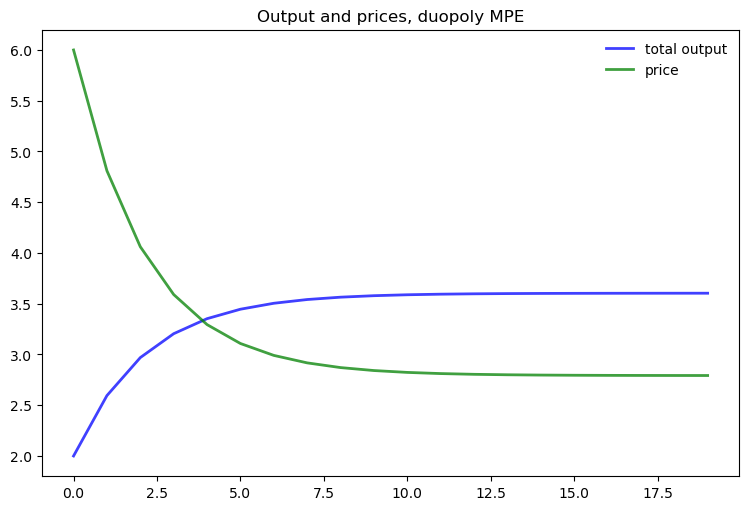

In [6]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

fig, ax = plt.subplots(figsize=(9, 5.8))
ax.plot(q, 'b-', lw=2, alpha=0.75, label='total output')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='price')
ax.set_title('Output and prices, duopoly MPE')
ax.legend(frameon=False)
plt.show()

Note that the initial condition has been set to $q_{10} = q_{20} = 1.0$.

To gain some perspective we can compare this to what happens in the monopoly case.

The first panel in the next figure compares output of the monopolist and industry output under the MPE, as a function of time.

The second panel shows analogous curves for price.

(mpe_vs_monopolist)=
```{figure} /_static/lecture_specific/markov_perf/mpe_vs_monopolist.png

```

Here parameters are the same as above for both the MPE and monopoly solutions.

The monopolist initial condition is $q_0 = 2.0$ to mimic the industry initial condition $q_{10} = q_{20} = 1.0$ in the MPE case.

As expected, output is higher and prices are lower under duopoly than monopoly.

## Exercises

```{exercise} 
:label: mp_ex1

Replicate the {ref}`pair of figures <mpe_vs_monopolist>` showing the comparison of output and prices for the monopolist and duopoly under MPE.

Parameters are as in duopoly_mpe.py and you can use that code to compute MPE policies under duopoly.

The optimal policy in the monopolist case can be computed using [QuantEcon.py](http://quantecon.org/quantecon-py)'s LQ class.
```

```{solution-start} mp_ex1
:class: dropdown
```

First, let's compute the duopoly MPE under the stated parameters

In [7]:
# == Parameters == #
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# == In LQ form == #
A  = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])
R1 = [[      0.,      -a0/2,          0.],
      [-a0 / 2.,         a1,     a1 / 2.],
      [       0,    a1 / 2.,          0.]]

R2 = [[     0.,          0.,     -a0 / 2],
      [     0.,          0.,     a1 / 2.],
      [-a0 / 2,     a1 / 2.,          a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# == Solve using QE's nnash function == #
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1,
                          Q2, S1, S2, W1, W2, M1,
                          M2, beta=β)

Now we evaluate the time path of industry output and prices given
initial condition $q_{10} = q_{20} = 1$.

In [8]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

Next, let's have a look at the monopoly solution.

For the state and control, we take

$$
x_t = q_t - \bar q
\quad \text{and} \quad
u_t = q_{t+1} - q_t
$$

To convert to an LQ problem we set

$$
R = a_1
\quad \text{and} \quad
Q = \gamma
$$

in the payoff function $x_t' R x_t + u_t' Q u_t$ and

$$
A = B = 1
$$

in the law of motion $x_{t+1} = A x_t + B u_t$.

We solve for the optimal policy $u_t = - Fx_t$ and track the
resulting dynamics of $\{q_t\}$, starting at $q_0 = 2.0$.

In [9]:
R = a1
Q = γ
A = B = 1
lq_alt = qe.LQ(Q, R, A, B, beta=β)
P, F, d = lq_alt.stationary_values()
q_bar = a0 / (2.0 * a1)
qm = np.empty(n)
qm[0] = 2
x0 = qm[0] - q_bar
x = x0
for i in range(1, n):
    x = A * x - B * F * x
    qm[i] = float(x) + q_bar
pm = a0 - a1 * qm

Let's have a look at the different time paths

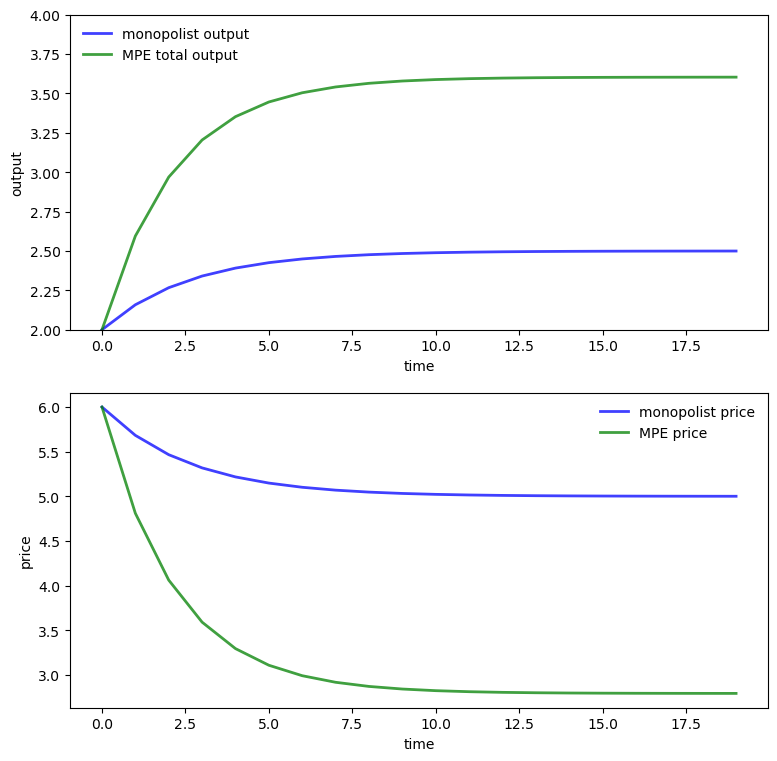

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(qm, 'b-', lw=2, alpha=0.75, label='monopolist output')
ax.plot(q, 'g-', lw=2, alpha=0.75, label='MPE total output')
ax.set(ylabel="output", xlabel="time", ylim=(2, 4))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(pm, 'b-', lw=2, alpha=0.75, label='monopolist price')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='MPE price')
ax.set(ylabel="price", xlabel="time")
ax.legend(loc='upper right', frameon=0)
plt.show()

```{solution-end}
```

```{exercise-start}
:label: mp_ex2
```

In this exercise, we consider a slightly more sophisticated duopoly problem.

It takes the form of infinite horizon linear-quadratic game proposed by Judd {cite}`Judd1990`.

Two firms set prices and quantities of two goods interrelated through their demand curves.

Relevant variables are defined as follows:

* $I_{it}$ = inventories of firm $i$ at beginning of $t$
* $q_{it}$ = production of firm $i$ during period $t$
* $p_{it}$ = price charged by firm $i$ during period $t$
* $S_{it}$ = sales made by firm $i$ during period $t$
* $E_{it}$ = costs of production of firm $i$ during period $t$
* $C_{it}$ = costs of carrying inventories for firm $i$ during $t$

The firms' cost functions are

* $C_{it} = c_{i1} + c_{i2} I_{it} + 0.5 c_{i3} I_{it}^2$
* $E_{it} = e_{i1} + e_{i2}q_{it} + 0.5 e_{i3} q_{it}^2$ where $e_{ij}, c_{ij}$ are positive scalars

Inventories obey the laws of motion

$$
I_{i,t+1} = (1 - \delta)  I_{it} + q_{it} - S_{it}
$$

Demand is governed by the linear schedule

$$
S_t = D p_{it} + b
$$

where

* $S_t = \begin{bmatrix} S_{1t} & S_{2t} \end{bmatrix}'$
* $D$ is a $2\times 2$ negative definite matrix and
* $b$ is a vector of constants

Firm $i$ maximizes the undiscounted sum

$$
\lim_{T \to \infty}\ {1 \over T}\   \sum^T_{t=0}\   \left( p_{it} S_{it} - E_{it} - C_{it} \right)
$$

We can convert this to a linear-quadratic problem by taking

$$
u_{it} =
\begin{bmatrix}
    p_{it} \\
    q_{it}
\end{bmatrix}
\quad \text{and} \quad
x_t =
\begin{bmatrix}
    I_{1t} \\
    I_{2t} \\
    1
\end{bmatrix}
$$

Decision rules for price and quantity take the form $u_{it} = -F_i  x_t$.

The Markov perfect equilibrium of Judd’s model can be computed by filling in the matrices appropriately.

The exercise is to calculate these matrices and compute the following figures.

The first figure shows the dynamics of inventories for each firm when the parameters are

In [11]:
δ = 0.02
D = np.array([[-1, 0.5], [0.5, -1]])
b = np.array([25, 25])
c1 = c2 = np.array([1, -2, 1])
e1 = e2 = np.array([10, 10, 3])

```{figure} /_static/lecture_specific/markov_perf/judd_fig2.png
```

Inventories trend to a common steady state.

If we increase the depreciation rate to $\delta = 0.05$, then we expect steady state inventories to fall.

This is indeed the case, as the next figure shows

```{figure} /_static/lecture_specific/markov_perf/judd_fig1.png
```

In this exercise, reproduce the figure when $\delta = 0.02$.

```{exercise-end}
```

```{solution-start} mp_ex2
:class: dropdown
```

We treat the case $\delta = 0.02$

In [12]:
δ = 0.02
D = np.array([[-1, 0.5], [0.5, -1]])
b = np.array([25, 25])
c1 = c2 = np.array([1, -2, 1])
e1 = e2 = np.array([10, 10, 3])

δ_1 = 1 - δ

Recalling that the control and state are

$$
u_{it} =
\begin{bmatrix}
    p_{it} \\
    q_{it}
\end{bmatrix}
\quad \text{and} \quad
x_t =
\begin{bmatrix}
    I_{1t} \\
    I_{2t} \\
    1
\end{bmatrix}
$$

we set up the matrices as follows:

In [13]:
# ==  Create matrices needed to compute the Nash feedback equilibrium == #

A = np.array([[δ_1,      0,    -δ_1 * b[0]],
              [  0,    δ_1,    -δ_1 * b[1]],
              [  0,      0,             1]])

B1 = δ_1 * np.array([[1, -D[0, 0]],
                     [0, -D[1, 0]],
                     [0,       0]])
B2 = δ_1 * np.array([[0, -D[0, 1]],
                     [1, -D[1, 1]],
                     [0,       0]])

R1 = -np.array([[0.5 * c1[2],     0,    0.5 * c1[1]],
                [          0,     0,              0],
                [0.5 * c1[1],     0,         c1[0]]])
R2 = -np.array([[0,               0,              0],
                [0,     0.5 * c2[2],    0.5 * c2[1]],
                [0,     0.5 * c2[1],         c2[0]]])

Q1 = np.array([[-0.5 * e1[2], 0], [0, D[0, 0]]])
Q2 = np.array([[-0.5 * e2[2], 0], [0, D[1, 1]]])

S1 = np.zeros((2, 2))
S2 = np.copy(S1)

W1 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e1[1],    b[0] / 2.]])
W2 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e2[1],    b[1] / 2.]])

M1 = np.array([[0, 0], [0, D[0, 1] / 2.]])
M2 = np.copy(M1)

We can now compute the equilibrium using `qe.nnash`

In [14]:
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1,
                          R2, Q1, Q2, S1,
                          S2, W1, W2, M1, M2)

print("\nFirm 1's feedback rule:\n")
print(F1)

print("\nFirm 2's feedback rule:\n")
print(F2)


Firm 1's feedback rule:

[[ 2.43666582e-01  2.72360627e-02 -6.82788293e+00]
 [ 3.92370734e-01  1.39696451e-01 -3.77341073e+01]]

Firm 2's feedback rule:

[[ 2.72360627e-02  2.43666582e-01 -6.82788293e+00]
 [ 1.39696451e-01  3.92370734e-01 -3.77341073e+01]]


Now let's look at the dynamics of inventories, and reproduce the graph
corresponding to $\delta = 0.02$

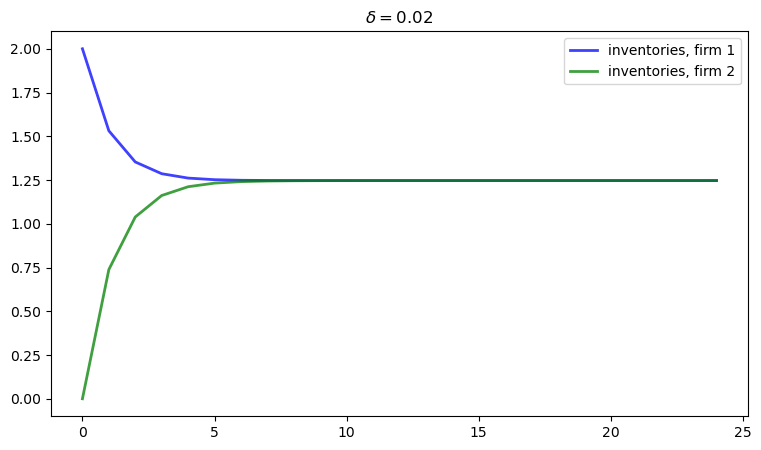

In [15]:
AF = A - B1 @ F1 - B2 @ F2
n = 25
x = np.empty((3, n))
x[:, 0] = 2, 0, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
I1 = x[0, :]
I2 = x[1, :]
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(I1, 'b-', lw=2, alpha=0.75, label='inventories, firm 1')
ax.plot(I2, 'g-', lw=2, alpha=0.75, label='inventories, firm 2')
ax.set_title(rf'$\delta = {δ}$')
ax.legend()
plt.show()

```{solution-end}
```